## The Data

<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081


* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [90]:
# Importing Dependencies
import warnings
import pandas as pd # Data analysis 
import numpy as np # Numerical work
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # vsiualization

from sklearn.tree import DecisionTreeClassifier # classification model
from sklearn.ensemble import RandomForestClassifier # classification model
from sklearn.svm import SVC # Classification Model

from sklearn.model_selection import train_test_split # Spliting data into train test split
from sklearn.model_selection import GridSearchCV # Searching for best hyperparameters

warnings.filterwarnings("ignore")

In [57]:
df  = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## EDA

In [58]:
# Cheacking how many etries do we have
df.shape

(344, 7)

#### Missing Data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [60]:
# Cheaking for null valuse
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [61]:
# We can drop all the null values or fill it with appropriate statistical values
# Lets Cheak if we drop all the null values what percetange of the whole data it will be
print(f"We will drop {(10/len(df))*100} % of the data")

We will drop 2.9069767441860463 % of the data


As aprox 3 % is not that big amount lets drop all the null values

In [62]:
df = df.dropna()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [64]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


### Exploring Catogorical Columns
Checking how many unique values do we have in each category

In [65]:
df.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

we see that there is   '.'   which is not a valide value, lets check how many '.' we have

In [39]:
# cheacking how many '.' we have in the whole data
(df.sex== '.').sum()

1

Luckely we have only 1 '.' in the whole data set lets remove it

In [67]:
df = df[df.sex!='.']
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [68]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Visualization

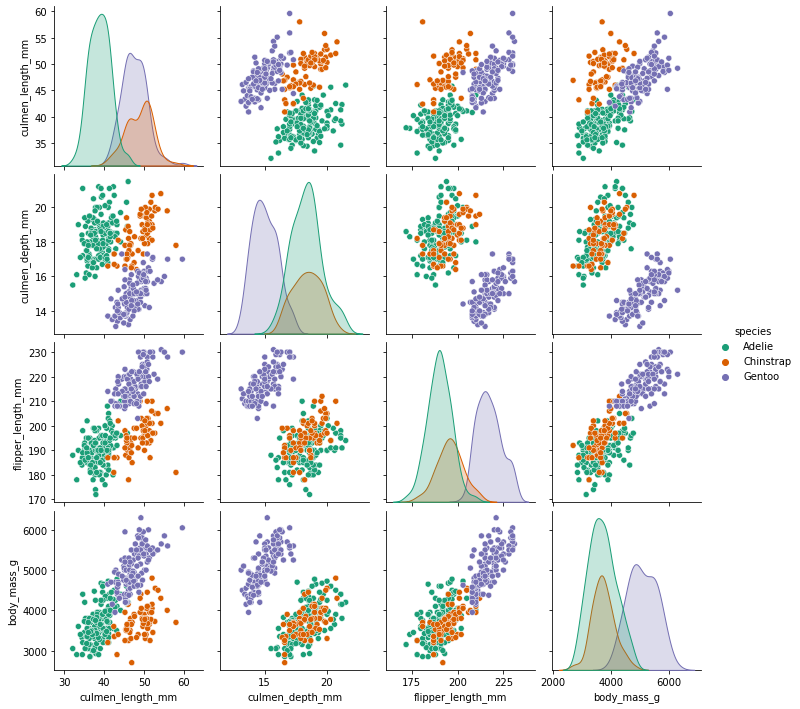

In [71]:
sns.pairplot(data=df, hue="species",palette='Dark2')

We see rhat the species are seprable easily based on culmen_depth_mm and culmen_lenght_mm 

lets visualize it sepratly

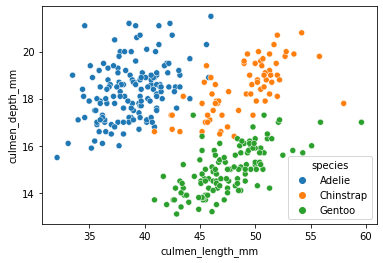

In [74]:
sns.scatterplot(data=df, x='culmen_length_mm',y='culmen_depth_mm',hue="species");

Creat a box plot to see it more clear

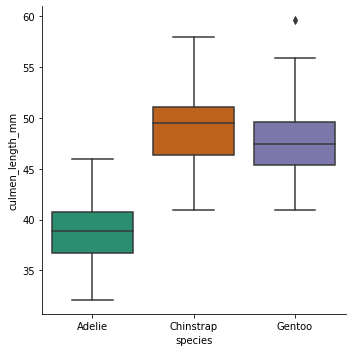

In [79]:
sns.catplot(data=df,x='species',y='culmen_length_mm',kind='box',palette='Dark2');

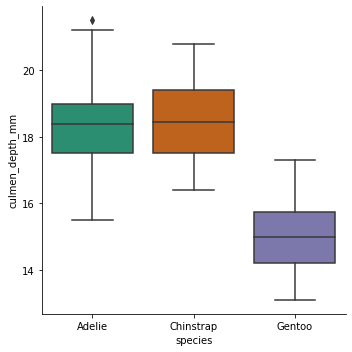

In [80]:
sns.catplot(data=df,x='species',y='culmen_depth_mm',kind='box',palette='Dark2');

## Feature Engineering

In [81]:
pd.get_dummies(df.drop(columns='species'), drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [82]:
X = pd.get_dummies(df.drop(columns='species'), drop_first=True)
y = df.species

## Train | Test Split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier 

### Default Hyperparameters

In [92]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
base_pred = dt_model.predict(X_test)

## Evaluation 

In [94]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

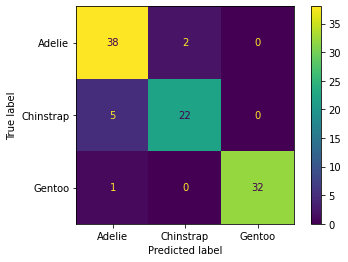

In [95]:
plot_confusion_matrix(estimator=dt_model,X=X_test,y_true=y_test);

In [96]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



In [97]:
dt_model.feature_importances_

array([0.33350103, 0.02010577, 0.58261583, 0.        , 0.03806069,
       0.        , 0.02571668])

In [107]:
(pd.DataFrame(
    index=X.columns,
    data= dt_model.feature_importances_, 
    columns=['Feature Importance'])
 .sort_values(by = 'Feature Importance',ascending=False))

,Feature Importance
flipper_length_mm,0.582616
culmen_length_mm,0.333501
island_Dream,0.038061
sex_MALE,0.025717
culmen_depth_mm,0.020106
body_mass_g,0.000000
island_Torgersen,0.000000


## Visualize the tree

In [108]:
from sklearn.tree import plot_tree

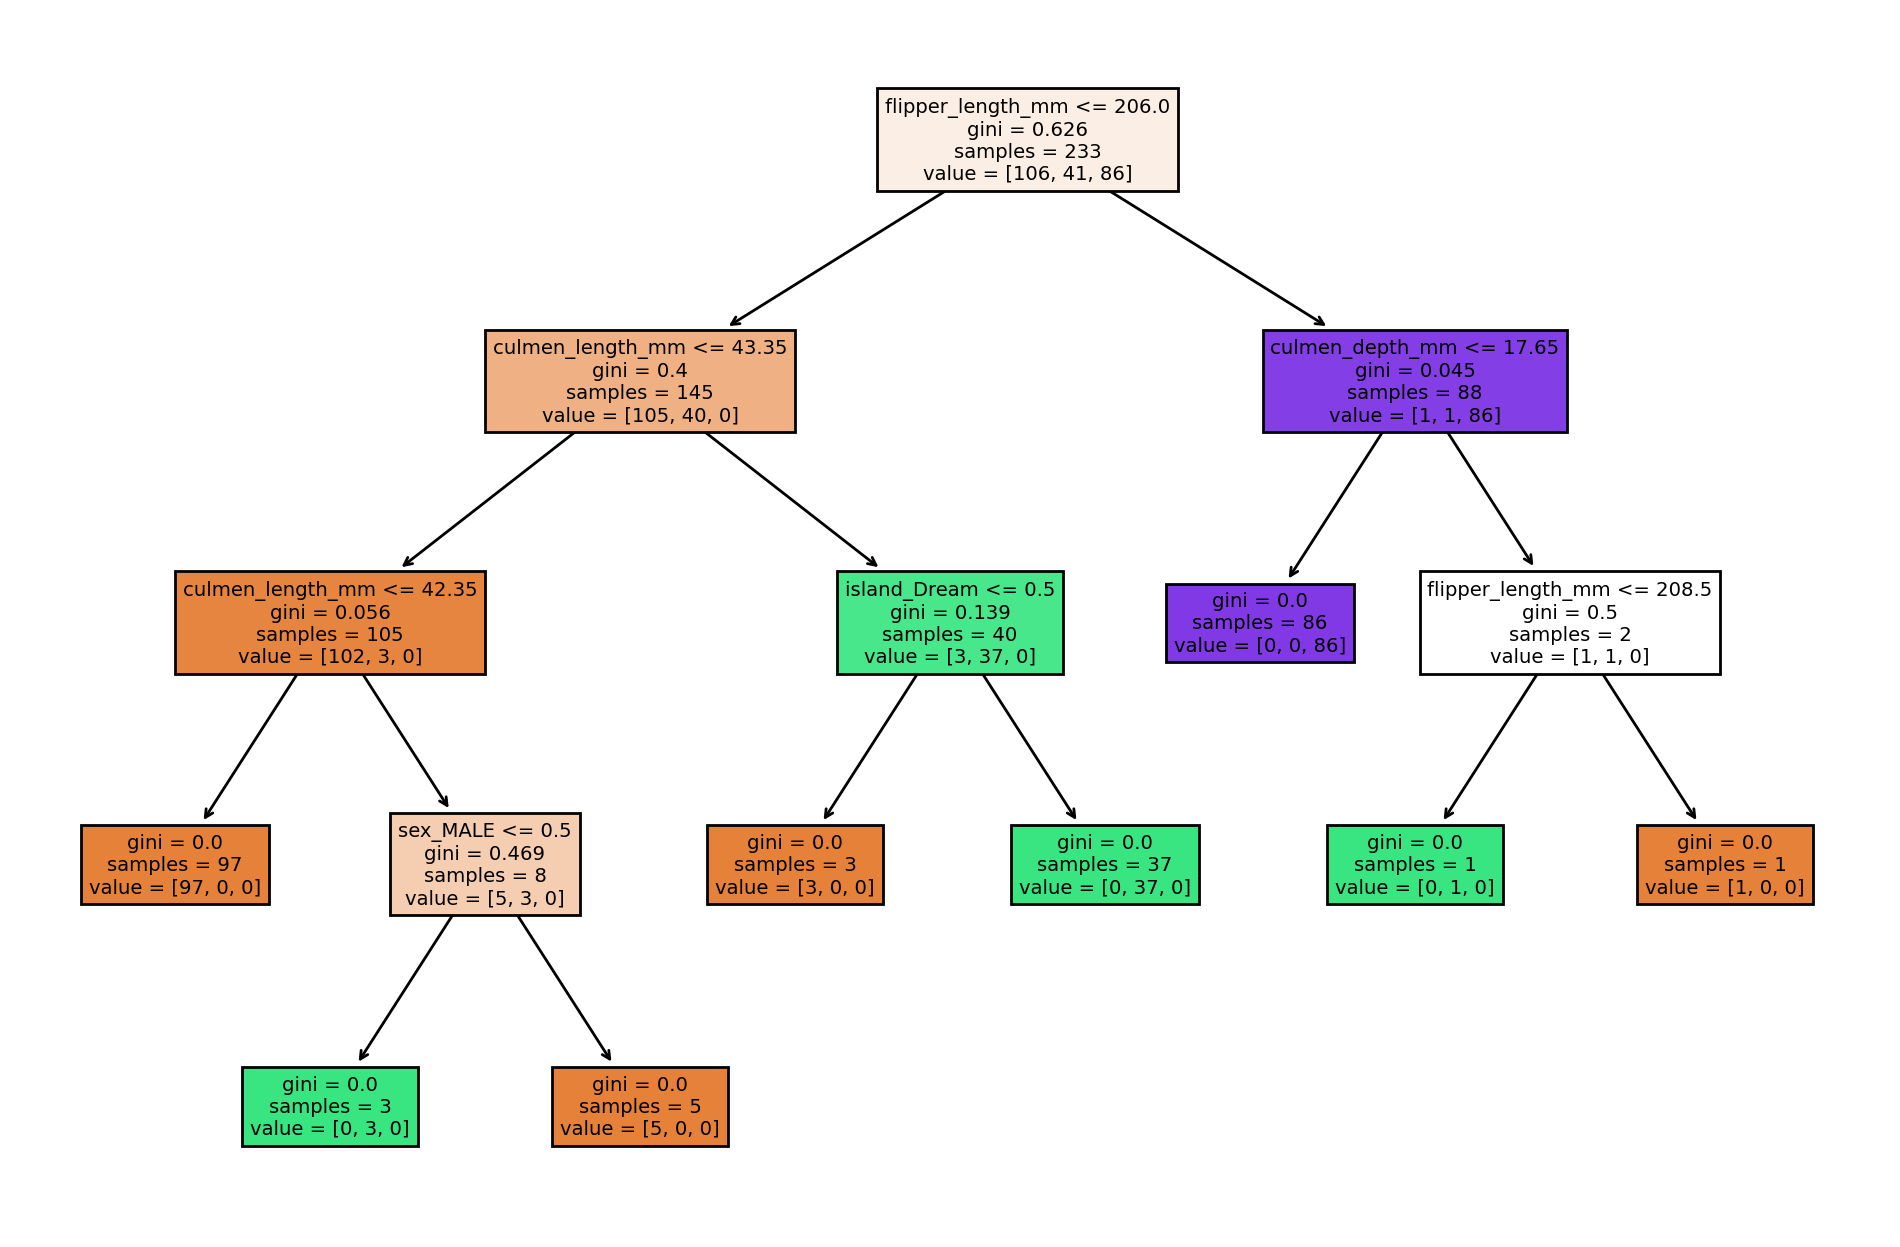

In [112]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(dt_model,filled=True, feature_names=X.columns);

# Randomforest Classifier

### Default Hyperparameters

In [115]:
rfc_model  =RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [116]:
rfc_pred = rfc_model.predict(X_test)

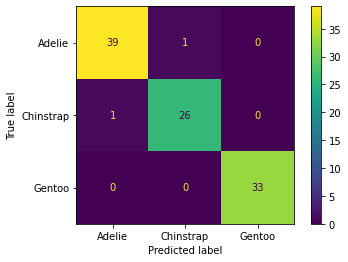

In [118]:
plot_confusion_matrix(estimator=rfc_model,X=X_test,y_true=y_test);

In [119]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

